# Machine Learning 401

## Artificial Neural Networks 

* İnsan beyninin bilg işleme şeklini refereans alan sınıflandırma ve regreyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalrından birisidir.
* Amaç en küçük hata ile tahmin yapabilecek katsayılara erişmektir.

* Yapay Sinir Ağları
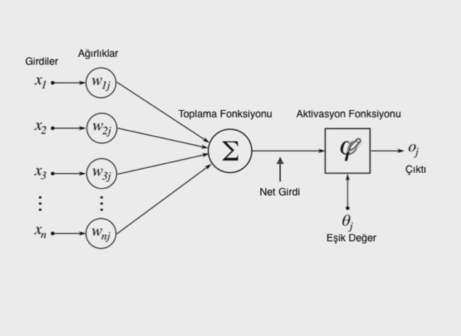

### Model ve Tahmin 

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [33]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [35]:
mlpc_model = MLPClassifier(max_iter = 200000).fit(X_train, y_train)

In [36]:
mlpc_model.coefs_

[array([[ 4.66906988e-01, -2.63136403e-01,  6.90647111e-01,
          1.58121466e-01, -1.08266703e-01, -2.88724977e-01,
         -3.60715773e-01, -3.18790508e-01,  3.02631300e-01,
         -1.46969131e-01,  1.67048103e-01, -3.69790723e-01,
         -5.90991131e-02, -1.29950490e-01, -5.07192918e-01,
          8.56769596e-01, -8.70032653e-01, -9.48338974e-01,
          7.83026377e-02,  9.24163649e-02,  7.69723036e-01,
         -8.09481737e-01, -3.77544677e-02,  4.02866050e-01,
          3.73803492e-01,  5.94417792e-01, -6.48444093e-01,
         -5.37956565e-01,  6.47716105e-02,  9.20800301e-01,
         -3.24730458e-01,  2.23946520e-01, -1.06583068e+00,
         -1.06316405e+00, -9.51033424e-01, -2.44451232e-01,
          5.14888810e-01, -1.31261974e-03, -1.06232551e+00,
         -3.53864699e-01,  6.97015708e-01,  1.11350107e+00,
          3.06707207e-01, -1.10843745e+00,  1.38168059e-01,
         -4.74084811e-01,  1.02215009e-01,  1.22056916e-01,
         -6.21697927e-01, -1.30678077e+0

In [37]:
?mlpc_model

In [38]:
y_pred = mlpc_model.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.683982683982684

### Model Tuning 

In [40]:
mlpc_params = {"alpha" : [0.03,0.005,0.0001],
              "hidden_layer_sizes" : [(10,10),(3,5)]}

# hidden_layer_sizes : gizli katman sayısı
# solver : modelde kullanılan ağırlıkları optimize etmek için kullanılan yötemlerdir. default hali 'adam'dır büyük veri setleri 
# için kullanılır 'lbfgs' küçük veri setleri için daha sağlıkldıır.
# alpha : ridge ve lassoda kullanılan ceza terimdiir.
# activation = "logistic" regresyon modelleri için relu kullanılır 

In [41]:
mlpc = MLPClassifier(max_iter = 200000,activation = "logistic") # activation = "logistic" regresyon modelleri için relu kullanılır 

In [42]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [43]:
mlpc_cv_model

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', max_iter=200000),
             n_jobs=-1,
             param_grid={'alpha': [0.03, 0.005, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (3, 5)]},
             verbose=2)

In [44]:
mlpc_cv_model.best_params_

{'alpha': 0.03, 'hidden_layer_sizes': (10, 10)}

In [45]:
# final modeli

In [46]:
mlpc_tuned = MLPClassifier(max_iter = 200000,solver = "lbfgs",activation = "logistic", alpha = 0.03, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

In [47]:
y_pred = mlpc_tuned.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [49]:
# ağaca dayalı algoritmalar hetorojen veri setlerinde daha iyi çalışır
# yapay sinir ağları homojen veri setlerinde daha iyi çalışabilir